<a href="https://colab.research.google.com/github/SumSera/winc-DA-opdrachten/blob/main/describing_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://static.wincacademy.nl/logos/main-logo.png" height=200px style="height: 200px"/>

# Describing Data

In [1]:
!pip install matplotlib --user > /dev/null 2>&1
!pip install numpy --user > /dev/null 2>&1
!pip install pandas --user > /dev/null 2>&1

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Describing a dataset is surprisingly hard. Take this (simulated) data containing total income in 1980 for each of the 100.000 inhabitans of Fooville, for example.

In [2]:
income_samples = np.round(np.hstack([np.random.normal(2.5e4, 5e3, int(7e4)),
                                     np.random.normal(5.5e4, 4e3, int(2e4)),
                                     np.random.normal(9e4, 2e3, int(1e4))]),
                          2)
income_samples[income_samples < 0] = - income_samples[income_samples < 0]
np.random.shuffle(income_samples)

pd.DataFrame(income_samples, columns=['Income'])

,Income
0,54036.52
1,23910.70
2,26226.84
3,25482.60
4,64477.29
...,...
99995,47177.22
99996,29116.93
99997,24248.84
99998,24924.66


These are 100k datapoints. It's impossible to look at them all one by one. How are we going to interpret that large bag of unsorted data?

## Mean

One measure we should take a look at is the average, the **mean** of the data. The mean is calculated like so:

1. Sum up all the values
2. Divide them by the number of datapoints

Let's apply this to our data from the inhabitants of Fooville.

In [3]:
income_samples_mean = np.mean(income_samples)
print(f'The mean income in Fooville is {income_samples_mean:.2f}')

The mean income in Fooville is 37492.32


**1. What is the mean of this list of numbers? [1, 9, 19, 100]**

*129/4= 32,25*

You, like me, might now be tempted to believe the data looks something like this.

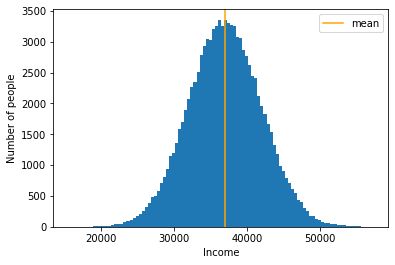

In [10]:
fig, ax = plt.subplots()
bin_vals, _, _ = ax.hist([np.random.normal(3.7e4, 5e3, int(10e4))], 100)
ax.axvline(3.7e4, label='mean', color='orange')
ax.set_xlabel('Income')
ax.set_ylabel('Number of people')
ax.legend();

**2. Explain how we should read this plot in your own words. Discuss specifically why the edge of the plot is not smooth. Hint: it's called a histogram.**

*The histogram plots values in ranges of income, this explains the jaggedness of the edge. narrowing the band (range) makes the histogram more accurate, but even less smooth*

**3. Why did we choose to draw the mean as a line, and not as a dot?**

*Because it is (sort of) true for all the values on the y-axis.*

**4. How realistic is it that this plot reflects the true situation, given the type of data we are looking at?**

*It is an extreme approximantion, limited by the width of the range.*

Let's take a look at the *real* histogram now.

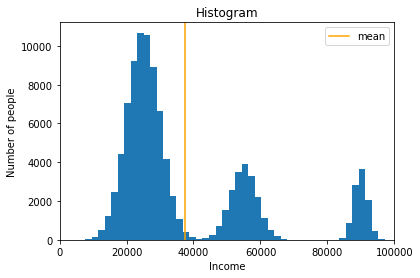

In [ ]:
fig, ax = plt.subplots()
ax.set_title('Histogram')
ax.hist(income_samples, bins=50)
ax.axvline(income_samples_mean, color='orange', label='mean')
ax.set_xlabel('Income')
ax.set_ylabel('Number of people')
ax.set_xlim([0, 1e5])
ax.legend();

**5. Why is the mean not located at a peak in the histogram?**

*Because there are multiple peaks, meaning that the mean is to the right of the large peak.*

**6. How can the two plots look so different, even though their mean is the same?**

*The data is sampled more accurately, but I don't understand exactly how right now... Somthing to do wth the 'bins'*

**7. How much useful information does the mean give about the data here, in your opinion? Explain why.**

*The plot itself gives more useful info than the mean, because very little people actually have a mean income, according to this plot.*

## Median


An alternative measure that may be more useful is the **median**. The median is the middle value in a sorted list of all the data. Here's how to find the median:

1. Sort the data.
2. Find the middle number. If there are an even number of datapoints, take the mean of the middle two.

In [20]:
income_samples_median = np.median(income_samples)
print(f'The median income in Fooville is {income_samples_median:.2f}')

The median income in Fooville is 27806.00


Let's visualize where it is exactly on our histogram.

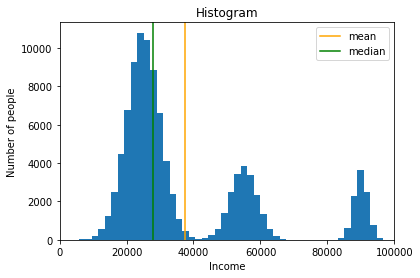

In [21]:
fig, ax = plt.subplots()
ax.set_title('Histogram')
ax.hist(income_samples, bins=50)
ax.axvline(income_samples_mean, color='orange', label='mean')
ax.axvline(income_samples_median, color='green', label='median')
ax.set_xlabel('Income')
ax.set_ylabel('Number of people')
ax.set_xlim([0, 1e5])
ax.legend();

**8. Is the median more informative about this dataset, in your opinion? Why? Consider the type of data that you're looking at.**

*Yes, a little. It seems a more realistic number visually*

**9. How many people in Fooville have an income below the median? How many have an income above the median?**

*The sum of the values in the columns to the left of the median. Above median is the total number of people in the sum of the values in the columns to the right of the median.*

**10. Which way does the median move if we mirror the data like we did in the bottom plot below? Which way does the mean move? Finally: which one moves more? Explain your answers.**

*Both the median and the mean move to the right, the median moves further right than the mean. They are mirrored the same way as the data.*

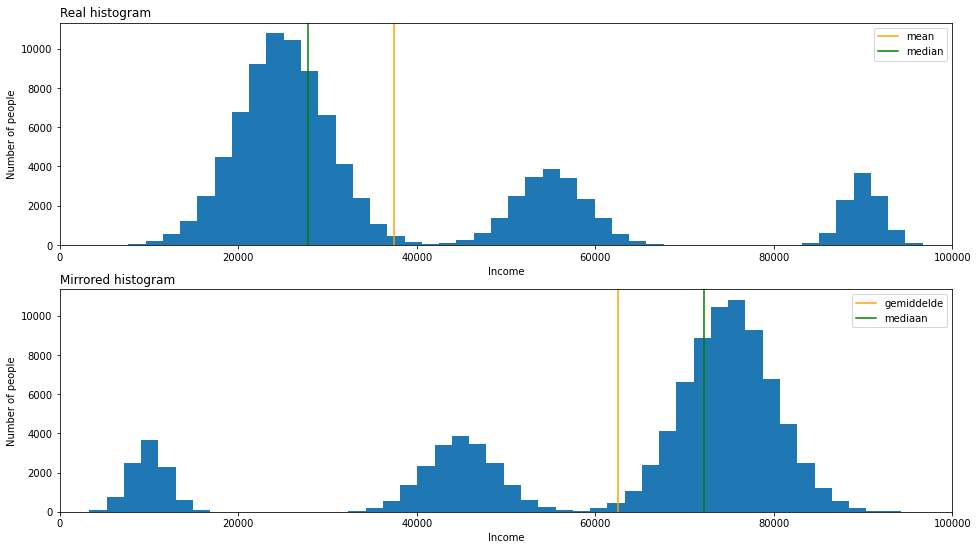

In [28]:
mirrored_income_samples = 0 - income_samples + 1e5
mirrored_income_samples_mean = 0 - income_samples_mean + 1e5
mirrored_income_samples_median = 0 - income_samples_median+ 1e5

fig, axs = plt.subplots(2, 1, figsize=(16,9))
axs[0].set_title('Real histogram', loc='left')
axs[0].hist(income_samples, bins=50)
axs[0].axvline(income_samples_mean, color='orange', label='mean')
axs[0].axvline(income_samples_median, color='green', label='median')
axs[0].set_xlabel('Income')
axs[0].set_ylabel('Number of people')
axs[0].set_xlim([0, 1e5])
axs[0].legend();

axs[1].set_title('Mirrored histogram', loc='left')
axs[1].hist(mirrored_income_samples, bins=50)
axs[1].axvline(mirrored_income_samples_mean, color='orange', label='gemiddelde')
axs[1].axvline(mirrored_income_samples_median, color='green', label='mediaan')
axs[1].set_xlabel('Income')
axs[1].set_ylabel('Number of people')
axs[1].set_xlim([0, 1e5]);
axs[1].legend();

## Mode and binning

A third number that gives some information about data is distributed is the **mode**. This is the value that occurs most frequently out of all the values.

Let's count how often each number occurs in our (non-mirrored) dataset and see which one occurs most often.

The mode of the income data from Fooville is 18039.02.
It occurs 3 times.


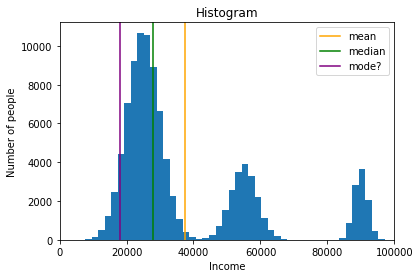

In [ ]:
unique, frequency = np.unique(income_samples, return_counts = True)
income_samples_mode_freq = np.max(frequency)
income_samples_mode = unique[np.argmax(frequency)]
print(f'The mode of the income data from Fooville is {income_samples_mode:.2f}.\n'
      f'It occurs {income_samples_mode_freq} times.')

fig, ax = plt.subplots()
ax.set_title('Histogram')
ax.hist(income_samples, bins=50)
ax.axvline(income_samples_mean, color='orange', label='mean')
ax.axvline(income_samples_median, color='green', label='median')
ax.axvline(income_samples_mode, color='purple', label='mode?')
ax.set_xlabel('Income')
ax.set_ylabel('Number of people')
ax.set_xlim([0, 1e5])
ax.legend();

Hm! This does not match with what we learn from our histogram.

**11. What level of income would you have expected to be the mode?**

*Somewhat below the mean, near the largest peak.*

**12. What is the problem that caused us to land on a strange value for the mode?**

*probably because the mode is a single value, not a range.*

The problem that we have can be solved by *binning* the numbers in our data. Here's how that works:

1. Choose a number of *bins*. Think of these like buckets.
2. Divide the area between the minimum and maximum values of the data into smaller areas according to the number of bins.
3. Look at each datapoint and put it in the bin that it belongs to.
4. Count how many datapoints are in each bin.
5. Let each bin be represented by the middle value of the bin.

Let's do this and find the mode again.

The mode of the income data from Fooville is 24626.18.
It occurs 5422 times.


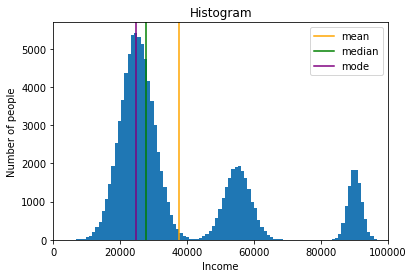

In [33]:
# PLAY AROUND WITH THIS VALUE
bins = 100
# DON'T MODIFY THE LINES BELOW

hist, bin_edges = np.histogram(income_samples, bins=bins)
income_samples_mode_freq = np.max(hist)
mode_bin_index = np.argmax(hist)
income_samples_mode = np.mean(bin_edges[mode_bin_index:mode_bin_index+2])
print(f'The mode of the income data from Fooville is {income_samples_mode:.2f}.\n'
      f'It occurs {income_samples_mode_freq} times.')
fig, ax = plt.subplots()
ax.set_title('Histogram')
ax.hist(income_samples, bins=bins)
ax.axvline(income_samples_mean, color='orange', label='mean')
ax.axvline(income_samples_median, color='green', label='median')
ax.axvline(income_samples_mode, color='purple', label='mode')
ax.set_xlabel('Income')
ax.set_ylabel('Number of people')
ax.set_xlim([0, 1e5])
ax.legend();

**13. How did binning solve the problem you described in your answer to question 12?**

*the mode is a range of incomes now in which a realistic number of people belong. The mode now is in the middle of the highest peak, as expected. *

**14. Would a bin count of 3 suffice? What about 100? What is the consideration in choosing a higher or lower bin count? And what is the downside of going too far in either direction?**

*lower bin counts make the results more general and less specific. Higher bin counts make the value more precise, and perhaps too specific. Either way it may not serve its purpose.*

## Quartiles and Boxplots

Finally, we will describe our data with a few extra measures:

- The min; the lowest value in the dataset.
- The max; the highest value in the dataset.
- The first quartile; the median of the lower half of the dataset. You find this value by sorting the data and selecting the middle of the lower half.
- The third quartile; the median of the upper half of the dataset. You find this value by sorting the data and selecting the middle of the upper half.

Together with the median, this is called the *five-number summary*. It is common to visualize these numbers in a type of plot that's called a *boxplot*. Here it is for the Fooville data.

The minimum is at 1823.86
The first quartile is at 23198.07
The third quartile is at 52293.45
The maximum is at 99107.38


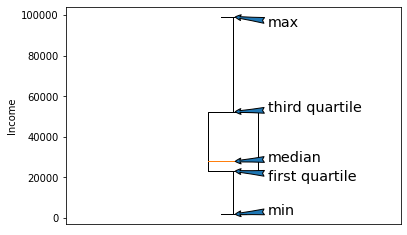

In [ ]:
fig, ax = plt.subplots()
ax.boxplot(income_samples, whis=(0,100))
sorted_income_samples = np.sort(income_samples)
minimum = np.min(income_samples)
maximum = np.max(income_samples)
first_quartile = sorted_income_samples[int(sorted_income_samples.shape[0] / 4)]
third_quartile = sorted_income_samples[int(3 * sorted_income_samples.shape[0] / 4)]
ax.annotate('min', (1, minimum), fontsize='x-large', xytext=(35, 0), textcoords='offset points', arrowprops={'arrowstyle':'fancy'})
ax.annotate('max', (1, maximum), fontsize='x-large', xytext=(35, -10), textcoords='offset points', arrowprops={'arrowstyle':'fancy'})
ax.annotate('median', (1, income_samples_median), fontsize='x-large', xytext=(35, 0), textcoords='offset points', arrowprops={'arrowstyle':'fancy'})
ax.annotate('first quartile', (1, first_quartile), fontsize='x-large', xytext=(35, -10), textcoords='offset points', arrowprops={'arrowstyle':'fancy'})
ax.annotate('third quartile', (1, third_quartile), fontsize='x-large', xytext=(35, 0), textcoords='offset points', arrowprops={'arrowstyle':'fancy'})
ax.set_ylabel('Income')
ax.set_xticks([])

print(f'The minimum is at {minimum}')
print(f'The first quartile is at {first_quartile}')
print(f'The third quartile is at {third_quartile}')
print(f'The maximum is at {maximum}')

Here is the boxplot again without our annotations.

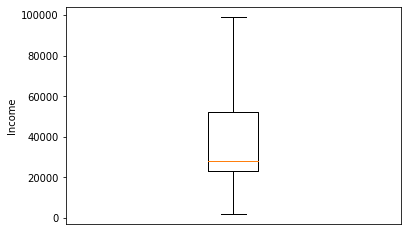

In [ ]:
fig, ax = plt.subplots()
ax.boxplot(income_samples, whis=(0,100))
ax.set_ylabel('Income')
ax.set_xticks([]);

**15. How many inhabitants of Fooville have an income above the first quartile?**

*cannot accurately be measured/written fom this boxplot.*

**16. How many inhabitants of Fooville have an income between the first and third quartile?**

*cannot accurately be measured/written fom this boxplot. It gives an idea of the spread.*

**17. Which of the following statements are correct? (type an `x` in those boxes)**

*TODO: Fill in the right boxes.*

   - [ ] "25% of all Fooville inhabitants have an income above 20.000"
   - [x] "50% of all Fooville inhabitants have an income between around 23.000 and around 52.000"
   - [ ] "There are no Fooville inhabitants with an income above 98.000."

**18. Does the mean always fall between the first and third quartile? Explain your answer.**

*Yes, because the quartiles are sorted.*

**19. Do you think a boxplot is a nice summary of the Fooville income data? Why? How does it compare to the histogram?**

*Yes, but I find it still a bit hard to read in terms of numbers of people.*

That's it for this lesson! You now have an intuitive understanding of:

- The mean
- The median
- The mode
- Binning
- Histograms
- The minimum and maximum
- The first and third quartile
- Boxplots

Congratulations! That's a lot of material to work through.